## 이번 강의 목표: 

* 데이터셋(데이터 세트)의 성격과 학습 알고리즘에 대한 이해없이 기계학습 알고리즘을 단순히 적용시키는 것은 무의미한 작업임을 이해  




* 사이킷런(Scikit-learn) 패키지의 기본적인 사용법을 실습을 통해 연습 




* 판별모델의 한 예인 **퍼셉트론 분류기(Perceptron classifier)** 의 알고리즘 이해 (수렴성)




* 생성모델의 한 예인 **나이브 베이즈 분류기(Naive Bayesian classifier)** 의 알고리즘 이해와 구현 




* 판별모델과 생성모델의 차이점을 예를 통해 이해 



* 학습 모델의 성능을 평가하는 기준의 선정에 대한 이해 

## 퍼셉트론 분류기(Perceptron classifier) [reference](https://en.wikipedia.org/wiki/Perceptron)

* 분류문제(레이블이 $0$과 $1$)에 대한 알고리즘으로 판별모델에 해당함  

> * 뒤에 배울 **서포트 벡터 머신** 의 특별한 경우이며, 신경망(neural network), 심층망(deep learning)의 시초 


* 특성벡터 $\mathbf x=(x_1,\cdots,x_n)^{\rm t}$에 대해 판별함수를 
$$\hat y = f(\mathbf x)=\begin{cases} 1 & \text{if}\ \ w_0+\sum_{i=1}^n w_i x_i>0\\ 0 & \text{if}\ \ w_0+\sum_{i=1}^n w_i x_i\le 0\end{cases} $$
로 정의하고, 성능이 좋아지도록 $w_0,w_1,\cdots,w_n$을 결정하는 과정이 학습 알고리즘  


> * 이때, $w_0$를 **편향(bias)**, $w_i\, (1\le i \le n)$을 **가중치(weights)** 라고 부름 (통계추론에서는 주로 $\beta_i$를 사용)  


> * 보통, 모델 파라미터를 $\mathbf w = (w_0,w_1,\cdots, w_n)^{\rm t}$로 나타내고, 특성벡터를 $\mathbf x=(1,x_1,\cdots,x_n)^{\rm t}$로 나타냄


> * 이때, 판별함수 식에서 $w_0+\sum_{i=1}^n w_ix_i=\langle \mathbf w,\mathbf x\rangle (= \mathbf w^{\rm t}\mathbf x= \mathbf x^{\rm t}\mathbf w)$로 이해할 수 있음 


* 전체 훈련 데이터 샘플의 개수를 $m$이라 할 때, 성능은 **정확도(Accuracy)**로 판단: 


> * 정확도 = 1-(오분류된 훈련 샘플의 개수/ $m$)


* 학습 알고리즘(퍼셉트론 알고리즘) : 모델 파라미터의 초깃값 $\mathbf w^{(0)}$을 임의로 설정한 후, 오분류된 각각의 샘플 $(\mathbf x_i,y_i)$에 대해 $\mathbf w^{(k)}$를 반복하여 업데이트 (레이블 $y_i$는 $0$ 또는 $1$)


> * $\mathbf w^{(k+1)} = \mathbf w^{(k)}+(y_i-\hat y_i)\mathbf x_i$ 또는 $\mathbf w^{(k+1)} = \mathbf w^{(k)}+\alpha (y_i-\hat y_i)\mathbf x_i$  (단, 학습률 $0<\alpha<1$는 하이퍼 파라미터)

<img src=".\images\week3\perceptron.png" width="900">

> * 퍼셉트론 알고리즘에서 모델 파라미터들의 벡터열(vector sequence) $\{\mathbf w^{(k)}$는 주어진 훈련 데이터셋의 샘플들이 **선형 분리가능(separable)** 일 때, 유한 번 만에 수렴함을 보일 수 있음 (아래 증명 참고)


>> * 선형 분리가능: 
>>> - $n$차원 유클리드 공간에서 초평면(hyper plane) $\mathbf w^{\rm t}\mathbf x=0$이 주어지면, 유클리드 공간은 초평면에 대해 두 영역 $\mathbf w^{\rm t}\mathbf x>0$과 $\mathbf w^{\rm t}\mathbf x<0$으로 나누어짐  
>>> - 선형 분리가능이란, 레이블이 $1$인 특성벡터($n$차원 벡터)들과 레이블이 $0$인 특성벡터들이 초평면의 서로 다른 영역에 각각 위치하도록 초평면을 잡을 수 있음을 의미 

> * 훈련 데이터셋이 선형 분리가능이 아닌 경우(즉, 유한 번에 학습이 종료되지 않는 경우), 반복횟수에 제한을 두거나, 정확도에 대한 한계치(threshold)를 설정하는 방법으로 학습을 조절하도록 구현 

> * `선형 분리가능인 경우 유한 번에 학습이 종료되는 것 증명 아이디어`:   

>> * 선형 분리가능이면 모든 훈련 샘플 $(\mathbf x_i,y_i) \ (1\le i \le m)$에 대해 다음 조건을 만족하는 모델 파라미터 $\mathbf w^*$가 존재
$$ \begin{cases} \langle \mathbf w^*,\mathbf x_i\rangle > 0 & \text{ if } y_i=1\\ \langle \mathbf w^*,\mathbf x_i\rangle < 0 & \text{ if } y_i=0\end{cases}$$  
>> * $\gamma = \text{min}\{|\langle \mathbf w^*,\mathbf x_i\rangle| : 1\le i \le m\}$으로 정의


>> * 지금부터 $\mathbf w^{(0)}=\mathbf 0$이라 가정하고, 아래 부등식으로부터 모든 $k$에 대해  $\langle \mathbf w^*,\mathbf w^{(k)}\rangle \ge k\gamma$을 얻음  (<span style="color:red">**check1**</span>)
>>> - $\mathbf w^{(k)}$에 대해 오분류된 훈련 샘플 $\mathbf x_i$ (즉, 실제 레이블은 $y_i=1$이고 $\hat y_i=0$, 또는  $y_i=0$이고 $\hat y_i=1$ )로부터 $\mathbf w^{(k+1)}$을 업데이트할 때,  
$$
\begin{aligned}
&\\
\langle \mathbf w^*,\mathbf w^{(k+1)}\rangle =& \langle \mathbf w^*, \mathbf w^{(k)}+(y_i-\hat y_i)\mathbf x_i\rangle\\
=& \langle \mathbf w^*, \mathbf w^{(k)}\rangle +(y_i-\hat y_i)\langle \mathbf w^*,\mathbf x_i\rangle\\
=&\langle \mathbf w^*, \mathbf w^{(k)}\rangle +|\langle \mathbf w^*,\mathbf x_i\rangle|\\
\ge &\langle \mathbf w^*, \mathbf w^{(k)}\rangle+\gamma
\end{aligned}$$

> * Cauchy-Schwartz 부등식으로부터 $k\gamma \le \langle \mathbf w^*,\mathbf w^{(k)}\rangle \le ||\mathbf w^*||\,||\mathbf w^{(k)}||$ $\ \cdots (1)$


> * 한편, $M=\text{max}\{||\mathbf x_i||:1\le i\le m\}$라 할 때, $\mathbf w^{(k)}$가 오분류된 훈련 샘플 $(\mathbf x_j,y_j)$와 $\mathbf w^{(k-1)}$로부터 업데이트 된다면, 다음 부등식이 성립 (<span style="color:red">**check2**</span>) 
$$
\begin{aligned}
&\\
||\mathbf w^{(k)}||^2 =& \langle \mathbf w^{(k-1)}+(y_j-\hat y_j)\mathbf x_j, \mathbf w^{(k-1)}+(y_j-\hat y_j)\mathbf x_j\rangle\\
\le &||\mathbf w^{(k-1)}||^2+||\mathbf x_j||^2\\  
\le &||\mathbf w^{(k-1)}||^2+M^2
\end{aligned}$$

> * 위 부등식으로부터 다음을 얻음 (<span style="color:red">**check3**</span>) : $$||\mathbf w^{(k)}||^2 \le kM^2\quad \cdots(2)$$


> * 위 결과 (1),(2)를 종합하면 다음과 같이 업데이트되는 횟수가 유한 번에 끝남을 알 수 있음
$$k\le \dfrac{M^2}{\gamma^2}||\mathbf w^*||^2$$

## 사이킷런(Scikit-learn)의 API 원칙

* 사이킷런의 모든 객체는 일관되고 단순한 인터페이스를 공유함 
> * 데이터셋을 기반으로 일련의 모델 파라미터들을 추정하는 객체를 **추정기(estimator)** 라 하고, 추정자체는 `fit()` 메소드에 의해 수행됨
> * 데이터셋을 변환하는 추정기를 **변환기(transformer)** 라 하고, 변환은 `transform()` 메소드에 데이터 세트를 전달하여 이루어짐
> * 모든 변환기는 `fit()`와 `transform()`메소드를 연달아 호출하는 것과 동일한 `fit_transform()`메소드도 가지고 있음 
> * 일부 추정기는 주어진 데이터셋에 대한 예측을 할 수 있는 `predict()` 메소드와 예측의 성능을 평가하는 `score()` 메소드를 갖고 있음 

* 여러 변환기를 연결한 다음 마지막에 추정기 하나를 배치하는 **Pipeline 추정기** 를 쉽게 만들 수 있음 

## 사이킷런의 Perceptron 분류기 

* `sklearn.linear_model`의 `Perceptron()`을 이용하여 객체 생성 : [API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html?highlight=perceptron#sklearn.linear_model.Perceptron)


* 훈련 데이터셋과 테스트 데이터셋의 구성은 `sklearn.model_selection`의 `train_test_split`를 이용 : [API](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test#sklearn.model_selection.train_test_split)

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

#### Pandas를 이용하여 데이터 파일 읽어들이고, 특성벡터과 레이블 열 선택 

* 데이터셋: Pima Indian(미국 토착 인디언 부족) 768명의 성인 여성에 대한 의료정보와 당뇨병 여부(label 1,0)이 담긴 데이터셋



* 미국 The National Institute of Diabetes and Digestive and Kidney Diseases에서 제공한 데이터셋으로 Kaggle에 공개되어 있는 [데이터셋](https://www.kaggle.com/uciml/pima-indians-diabetes-database)



* 혈당(Blood Glucose)과 체질량지수(BMI)를 이용하여 당뇨병여부를 예측 분류하는 분류기를 구성하는 것을 실습 ([BMI의 계산법](http://www.tongyeong.go.kr/health/01635/01898/01902.web))

In [3]:
data = pd.read_csv('./datasets/PimaIndiansDiabetes.csv')

In [4]:
data.columns

Index(['Pregnancy Count', 'Blood Glucose', 'Diastolic BP',
       'Triceps Skin Fold Thickness', 'Serum Insulin', 'BMI',
       'Diabetes Pedigree Function', 'Age', 'Class'],
      dtype='object')

In [5]:
data_subset = data.loc[:,['Blood Glucose', 'Diastolic BP','BMI', 'Class']]

In [6]:
data_subset.head(n=5)

,Blood Glucose,Diastolic BP,BMI,Class
0,148,72,33.6,1
1,85,66,26.6,0
2,183,64,23.3,1
3,89,66,28.1,0
4,137,40,43.1,1


In [7]:
X = data_subset.loc[:, ['Blood Glucose','Diastolic BP','BMI']]
y = data_subset.loc[:, 'Class']

#### 훈련 데이터셋과 테스트 데이터셋의 구성 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=10,stratify=y) 

#### Perceptron 분류기 학습, 예측 및 성능 평가 

In [9]:
len(X_train)/len(X)

0.75

In [10]:
# 추정기 객체 생성 및 추정 

classifierP = Perceptron()
classifierP.fit(X_train, y_train)

Perceptron()

In [11]:
# predict() 메소드를 이용한 예측과 score() 메소드를 이용한 성능 평가

y_test_hat = classifierP.predict(X_test)

In [12]:
print(type(y_test_hat))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [13]:
y_test_org = y_test.to_numpy()

In [14]:
correct_prediction = (y_test_hat == y_test_org)
correct_prediction[:10]

array([ True, False,  True, False,  True, False, False,  True, False,
        True])

In [15]:
correct_prediction.mean()

0.640625

In [16]:
classifierP.score(X_test,y_test)

0.640625

In [17]:
classifierP.score(X_train,y_train)

0.6458333333333334

#### 퍼셉트론 분류기의 정확도가 떨어지는 이유는 주어진 훈련 데이터셋이 선형 분리가능이 아니기 때문 

* matplotlib.pyplot의 scatter을 이용하여 $2$차원에서 그림을 그려보면, 선형 분리가능이 아님을 쉽게 확인할 수 있음  

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

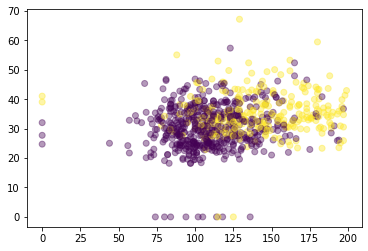

In [19]:
plt.scatter(data_subset['Blood Glucose'],data_subset['BMI'], c = data_subset['Class'], alpha = 0.4)

## 연습문제 

1) 퍼셉트론 분류기의 학습 알고리즘에서 훈련 데이터셋이 선형 분리가능이면 정확도가 $1$이 되는 모델 파라미터를 유한 번만에 업데이트 시킬 수 있음을 보이는 증명과정에서 <span style="color:red">**check1**, **check2**, **check3**</span> 부분을 증명하시오. 

2) 훈련 데이터셋과 테스트 데이터셋을 구성하는 사이킷런의 `train_test_split()`을 사용할 때, `random_state`값을 다른 값으로 설정하면 두 데이터셋의 구성이 달라진다.  

>2-1) `random_state=10`으로 수정한 후 퍼셉트론 분류기의 추정기를 생성하고, 학습시킨 후 테스트셋에 대한 정확도를 구하시오.   
    
>2-2) 앞서 random_state=20으로 학습시킨 퍼셉트론 분류기의 정확도와 어떤 차이가 있는가? 이 차이가 발생한 이유에 대해 설명하시오.  
    
>2-3) 훈련 데이터셋과 테스트 데이터셋을 어떻게 구성하여야 서로 다른 훈련 세트에 대해 학습시킨 모델의 정확도에 차이가 생기지 않을지에 대해 의견을 제시하시오. 

3) 주어진 Pima Indians Diabetes 훈련 데이터셋에 대해 다음과 같은 DummyClassifier를 구현하고 정확도를 구하시오. 

> DummyClassifier는 훈련 데이터셋에서 가장 많이 나타나는 레이블을 구한 다음, 모든 샘플에 대해 구한 레이블을 예측값으로 반환하는 분류기 

4) 본 강의에서 만든 퍼셉트론 분류기는 특성벡터로 'Blood Glucose'와 'BMI'만을 고려하였다. 이 두 가지 특성 외에 확장기 혈압(Diastolic Blood Press)를 뜻하는 'Diastolic BP'까지 추가한 3차원 특성벡터에 대해 퍼셉트론 분류기를 구성하고, 두 가지 분류기 중 어떤 분류기의 성능이 더 좋은지 설명하시오.  

5) Numpy만을 이용하여 Perceptron 분류기를 직접 구현하시오. 